### REDDI SRIJA R

### 20BTRCD014

### Pima Indians Diabetes Database

Problem Statement : 
1. Perform the Data Exploratory Analysis. on the given Dataset. 
2. Can you build a machine learning model { Any Model } to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
lab = pd.read_csv("diabetes.csv")

A DataFrame has been created using 'Pandas' by importing our .csv file 

In [3]:
lab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
lab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.Exploratory Data Analysis

In [5]:
lab.shape

(768, 9)

Our dataset has 768 rows and 9 columns or features

In [6]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
lab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we don't have any null values in our dataset, no need to change anything

In [8]:
lab.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


'Glucose' has the maximum and 'BloodPressure' has the minimum positive linear correlation with 'Outcome'.

There is no feature that has a negative linear correlation with 'Outcome'

In [9]:
lab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The minimum value of the features 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' is 0. These values cannot be 0. Thus, this can be called as "missing data" in our case. We need to either drop the 0-valued rows or we need to replace them with the "mean" or "median" value of that feature.

In [10]:
lab = lab[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Insulin','Age','Outcome']]
lab = lab.sort_values(by='Age')
lab

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Insulin,Age,Outcome
255,1,113,33.6,0.543,0,21,1
60,2,84,0.0,0.304,0,21,0
102,0,125,22.5,0.262,0,21,0
182,1,0,27.7,0.299,23,21,0
623,0,94,43.5,0.347,115,21,0
...,...,...,...,...,...,...,...
123,5,132,26.8,0.186,0,69,0
684,5,136,0.0,0.640,0,69,0
666,4,145,32.5,0.235,0,70,1
453,2,119,19.6,0.832,0,72,0


In [11]:
lab.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,0.471876,79.799479,33.240885,0.348958
std,3.369578,31.972618,7.884160,0.331329,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,0.000000,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,30.500000,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,127.250000,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,846.000000,81.000000,1.000000


<AxesSubplot:>

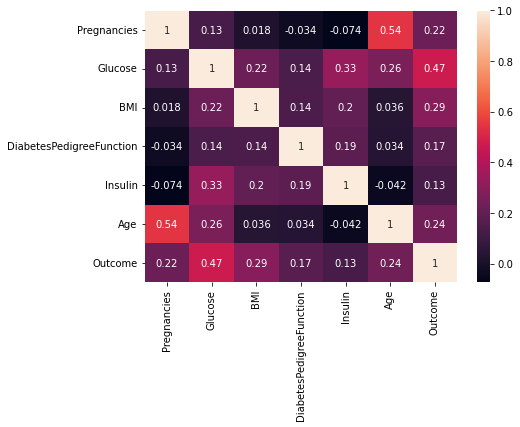

In [12]:
conf_mat = lab.corr()
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat, annot=True)

Let's fill those features containing '0' values with mean or median values

To decide which method to use, let's visualize the data

C:\Users\Radha Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

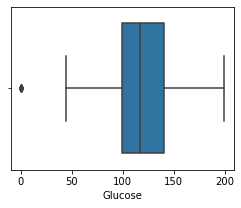

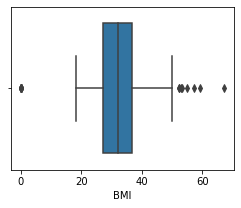

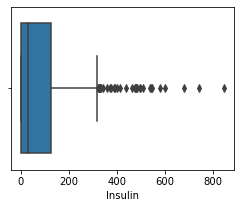

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(lab.Glucose)

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(lab.BMI)

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(lab.Insulin)

As the box-plots of 'Glucose' and 'Insulin' tells us that the data is skewed --> So, we can use medium method to fill missing values

As box plot of 'BMI' is showing that the data is not skewed --> we can use mean method to fill missing values

In [14]:
lab.fillna(lab.mean)

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Insulin,Age,Outcome
255,1,113,33.6,0.543,0,21,1
60,2,84,0.0,0.304,0,21,0
102,0,125,22.5,0.262,0,21,0
182,1,0,27.7,0.299,23,21,0
623,0,94,43.5,0.347,115,21,0
...,...,...,...,...,...,...,...
123,5,132,26.8,0.186,0,69,0
684,5,136,0.0,0.640,0,69,0
666,4,145,32.5,0.235,0,70,1
453,2,119,19.6,0.832,0,72,0


In [15]:
median = []
features = ['Glucose', 'Insulin']
for f in features:
    median.append(lab[f].median())

def replace_with_median(lab, f, value):
    lab[f] = lab[f].replace(0, value)
    
for i, f in enumerate(features):
    replace_with_median(lab, f, median[i])
    
    
mean = []
features_ = ['BMI']
for f1 in features_:
    mean.append(lab[f1].mean())

def replace_with_mean(lab, f1, value):
    lab[f1] = lab[f1].replace(0, value)
    
for i, f1 in enumerate(features_):
    replace_with_mean(lab, f1, mean[i])

In [16]:
lab

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Insulin,Age,Outcome
255,1,113,33.600000,0.543,30.5,21,1
60,2,84,31.992578,0.304,30.5,21,0
102,0,125,22.500000,0.262,30.5,21,0
182,1,117,27.700000,0.299,23.0,21,0
623,0,94,43.500000,0.347,115.0,21,0
...,...,...,...,...,...,...,...
123,5,132,26.800000,0.186,30.5,69,0
684,5,136,31.992578,0.640,30.5,69,0
666,4,145,32.500000,0.235,30.5,70,1
453,2,119,19.600000,0.832,30.5,72,0


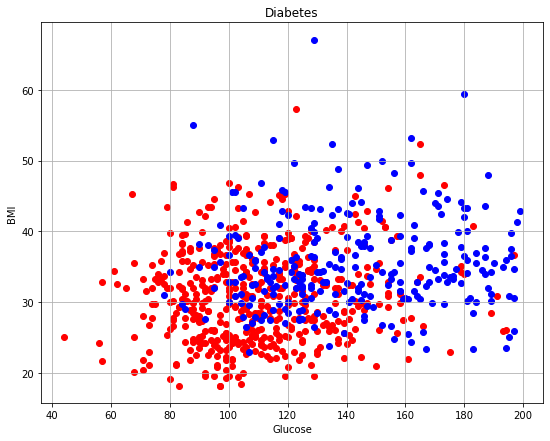

In [17]:
zero = lab[lab.Outcome == 0]
one = lab[lab.Outcome == 1]
fig, sub = plt.subplots()
fig.set_size_inches(9,7)

sub.scatter(zero['Glucose'],zero['BMI'], color='red')
sub.scatter(one['Glucose'],one['BMI'], color='blue')

sub.set_xlabel("Glucose")
sub.set_ylabel("BMI")
sub.grid()
sub.set_title("Diabetes")
plt.show()

Glucose and BMI will be good predictors as compared to others

In [18]:
X = lab.iloc[:,1:3].values
y = lab.iloc[:,-1].values

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Splitting the dataset into train data and test data with 80:20 ratio.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2. Model

a. Logistic Regression

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
log_pred = log_reg.predict(X_test)
log_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [23]:
log_accuracy = log_reg.score(X_test, y_test)
log_accuracy

0.7857142857142857

b. Decision Tree classifier

In [24]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
tree_pred = tree.predict(X_test)
tree_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [26]:
tree_accuracy = tree.score(X_test, y_test)
tree_accuracy

0.6623376623376623

c. K Nearest Neighbors Classifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [28]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
knn_accuracy = knn.score(X_test, y_test)
knn_accuracy

0.8051948051948052

In [30]:
mc = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree Classifier', 'K Nearest Neighbors Classifier '], 'Score': [log_accuracy, tree_accuracy, knn_accuracy]})
mc_s = mc.sort_values(by = 'Score', ascending = False)
mc_s = mc_s.set_index('Score')
mc_s

,Model
Score,
0.805195,K Nearest Neighbors Classifier
0.785714,Logistic Regression
0.662338,Decision Tree Classifier


### K Nearest Neighbors Classifier

Evaluation of model performance

In [31]:
print("Precision and recall are")
print(classification_report(y_test, knn_pred))

Precision and recall are
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       100
           1       0.85      0.54      0.66        54

    accuracy                           0.81       154
   macro avg       0.82      0.74      0.76       154
weighted avg       0.81      0.81      0.79       154



Precision of a patient being detected with 'no diabetes' is more with recall value close to 1 i.e 0.95

In [32]:
print(confusion_matrix(y_test, knn_pred))

[[95  5]
 [25 29]]


we can tell from confusion matrix that, model is predicting 95 values correctly i.e, if patient had diabetes, then model is also predicting that patient has diabetes

### Thank You